In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('SeaPlaneTravel.csv')
df.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df = pd.read_csv('SeaPlaneTravel.csv',parse_dates=['Month'])
df.head()

,Month,#Passengers
0,2003-01-01,112
1,2003-02-01,118
2,2003-03-01,132
3,2003-04-01,129
4,2003-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.set_index("Month",inplace=True)
df.columns = ['Passengers']
df.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


<Axes: xlabel='Month'>

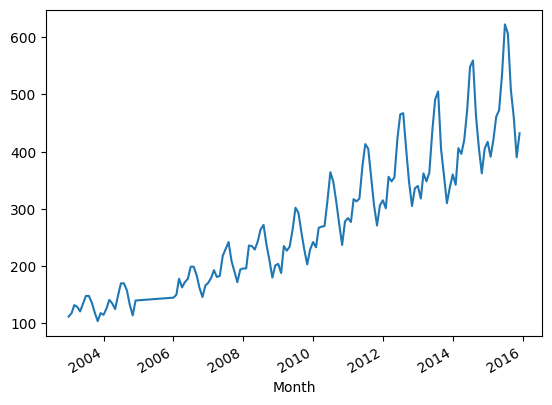

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Passengers'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
print(f"The p-value of the given data is {adfuller(df['Passengers'])[1]}")

The p-value of the given data is 0.9918802434376409


In [ ]:
# Since p > 0.05 - Null Hypothesis
# Given data is a non-stationary data

In [9]:
print(f"The p-value of the data after 1st order difference is {adfuller(df['Passengers'].diff().dropna())[1]}")

The p-value of the data after 1st order difference is 0.05421329028382792


In [10]:
print(f"The p-value of the data after 2nd order difference is {adfuller(df['Passengers'].diff().diff().dropna())[1]}")

The p-value of the data after 2nd order difference is 2.7328918500142026e-29


In [11]:
# Statistical Models
# ARIMA
!pip install pmdarima

     |████████████████████████████████| 580 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 988 kB 32.3 MB/s eta 0:00:01


In [12]:
import pmdarima as pm
pm.auto_arima(df['Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
import statsmodels.api as sm
ts = df['Passengers']
ts

Month
2003-01-01    112
2003-02-01    118
2003-03-01    132
2003-04-01    129
2003-05-01    121
             ... 
2015-08-01    606
2015-09-01    508
2015-10-01    461
2015-11-01    390
2015-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [14]:
model = sm.tsa.arima.ARIMA(ts, order=(4,1,3))
result = model.fit()

/Users/nachikethpro/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nachikethpro/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nachikethpro/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
result.forecast()

/Users/nachikethpro/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    467.573901
dtype: float64

In [16]:
result.predict(144,155)

144    467.573901
145    490.494756
146    509.137139
147    492.554920
148    495.306027
149    475.947798
150    476.339813
151    475.552124
152    472.353862
153    483.889740
154    475.570287
155    485.921633
Name: predicted_mean, dtype: float64